In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
df_diabetes = pd.read_csv('/Users/nagathanaykancharala/desktop/pds3/raw_data/diabetes.csv')
str(df_diabetes)

'     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \\\n0              6      148             72             35        0  33.6   \n1              1       85             66             29        0  26.6   \n2              8      183             64              0        0  23.3   \n3              1       89             66             23       94  28.1   \n4              0      137             40             35      168  43.1   \n..           ...      ...            ...            ...      ...   ...   \n763           10      101             76             48      180  32.9   \n764            2      122             70             27        0  36.8   \n765            5      121             72             23      112  26.2   \n766            1      126             60              0        0  30.1   \n767            1       93             70             31        0  30.4   \n\n     DiabetesPedigreeFunction  Age  Outcome  \n0                       0.627   50        1  \n1 

In [18]:
# Getting the info of complete csv
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
missing_values_per_column = df_diabetes.isnull().sum()

In [20]:
total_missing_values = df_diabetes.isnull().sum().sum()
print("Missing values per column:")
print(missing_values_per_column)
print("\nTotal missing values in the entire data frame:", total_missing_values)

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values in the entire data frame: 0


In [21]:
#---------------------A)setting a seed value and working on a sample size of 25 ----------------------
# Set seed for reproducibility
np.random.seed(777)
# Take a random sample of 25 observations
sampleObservations25 = df_diabetes.sample(n=25, replace=False)
# Printing the info of the Sample data
print(sampleObservations25.info())
# Getting the info of sample data
print(sampleObservations25.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 387 to 644
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               25 non-null     int64  
 1   Glucose                   25 non-null     int64  
 2   BloodPressure             25 non-null     int64  
 3   SkinThickness             25 non-null     int64  
 4   Insulin                   25 non-null     int64  
 5   BMI                       25 non-null     float64
 6   DiabetesPedigreeFunction  25 non-null     float64
 7   Age                       25 non-null     int64  
 8   Outcome                   25 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.0 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    25.000000   25.000000      25.000000       25.00000   25.000000   
mean      4.760000  121.960000      74.760000       23.12000   61.160000   
std       2.

In [22]:
# Finding the mean of the samples and population
population_mean_glucose = df_diabetes['Glucose'].mean()
population_max_glucose = df_diabetes['Glucose'].max()
sampleObservations25_mean_glucose = sampleObservations25['Glucose'].mean()
sampleObservations25_max_glucose = sampleObservations25['Glucose'].max()

# Printing the values
print(f"{population_mean_glucose} is the Population mean glucose")
print(f"{population_max_glucose} is the Population max glucose")
print(f"{sampleObservations25_mean_glucose} is the Sample mean glucose")
print(f"{sampleObservations25_max_glucose} is the Sample max glucose")

120.89453125 is the Population mean glucose
199 is the Population max glucose
121.96 is the Sample mean glucose
197 is the Sample max glucose


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

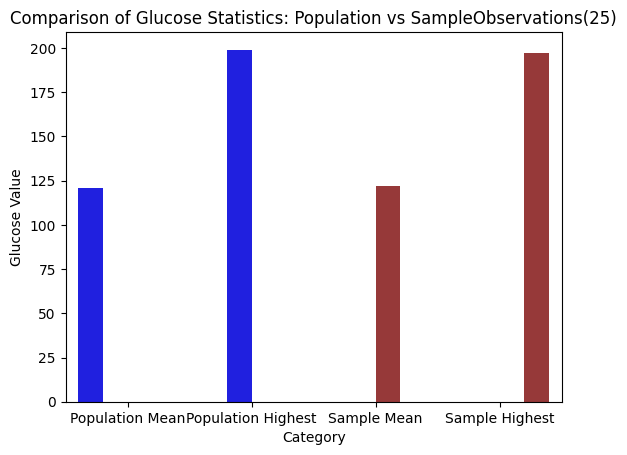

In [23]:
# Create a data frame for population and sample statistics
stats_data = pd.DataFrame({
    'Category': ["Population Mean", "Population Highest", "Sample Mean", "Sample Highest"],
    'Glucose': [population_mean_glucose, population_max_glucose, sampleObservations25_mean_glucose, sampleObservations25_max_glucose],
    'Group': ["Population", "Population", "Sample", "Sample"]
})

# Create a bar chart to compare statistics
sns.barplot(x='Category', y='Glucose', hue='Category', data=stats_data, dodge=True, palette=["blue", "blue", "brown", "brown"])
plt.title("Comparison of Glucose Statistics: Population vs SampleObservations(25)")
plt.ylabel("Glucose Value")
plt.legend().remove()
plt.show()

In [24]:
#---------------B) Calculating the 98th percentile of BMI for sample and population data---------------------------------

In [25]:
# Calculate the 98th percentile of BMI for the population
population_98th_percentile = np.percentile(df_diabetes['BMI'], 98)
# Calculate the 98th percentile of BMI for the sample(25)
sampleObservations25_98th_percentile = np.percentile(sampleObservations25['BMI'], 98)

print(population_98th_percentile)
print(sampleObservations25_98th_percentile)

47.52599999999996
51.587999999999994


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Futur

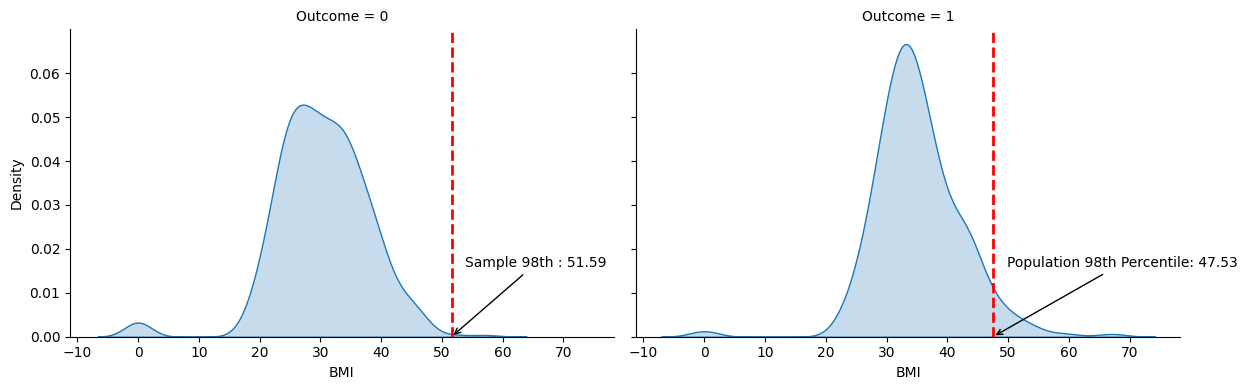

In [26]:
# Create a combined data frame for population and sample data
combined_data = pd.concat([df_diabetes.assign(Group="Population"), sampleObservations25.assign(Group="Sample(25)")])
# Create a FacetGrid for BMI distribution based on "Outcome"
grid = sns.FacetGrid(df_diabetes, col="Outcome", height=4, aspect=1.5)
grid.map(sns.kdeplot, "BMI", fill=True)
grid.set_axis_labels("BMI", "Density")

# Add vertical lines for the 98th percentile
grid.axes[0, 0].axvline(sampleObservations25_98th_percentile, color='red', linestyle='dashed', linewidth=2)
grid.axes[0, 1].axvline(population_98th_percentile, color='red', linestyle='dashed', linewidth=2)

# Add annotations
grid.axes[0, 0].annotate(f'Sample 98th : {round(sampleObservations25_98th_percentile, 2)}',
                        xy=(sampleObservations25_98th_percentile, 0), xytext=(10, 50),
                        textcoords='offset points', arrowprops=dict(arrowstyle="->"))
grid.axes[0, 1].annotate(f'Population 98th Percentile: {round(population_98th_percentile, 2)}',
                        xy=(population_98th_percentile, 0), xytext=(10, 50),
                        textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Show the plot
plt.show()

In [27]:
#-------------- C)Using Bootstrap creating 500 samples -----------------------------------------------------------------------


population_mean_blood_pressure: 69.10546875
population_std_dev_blood_pressure: 19.355807170644777
population_98th_percentile_blood_pressure: 99.31999999999994


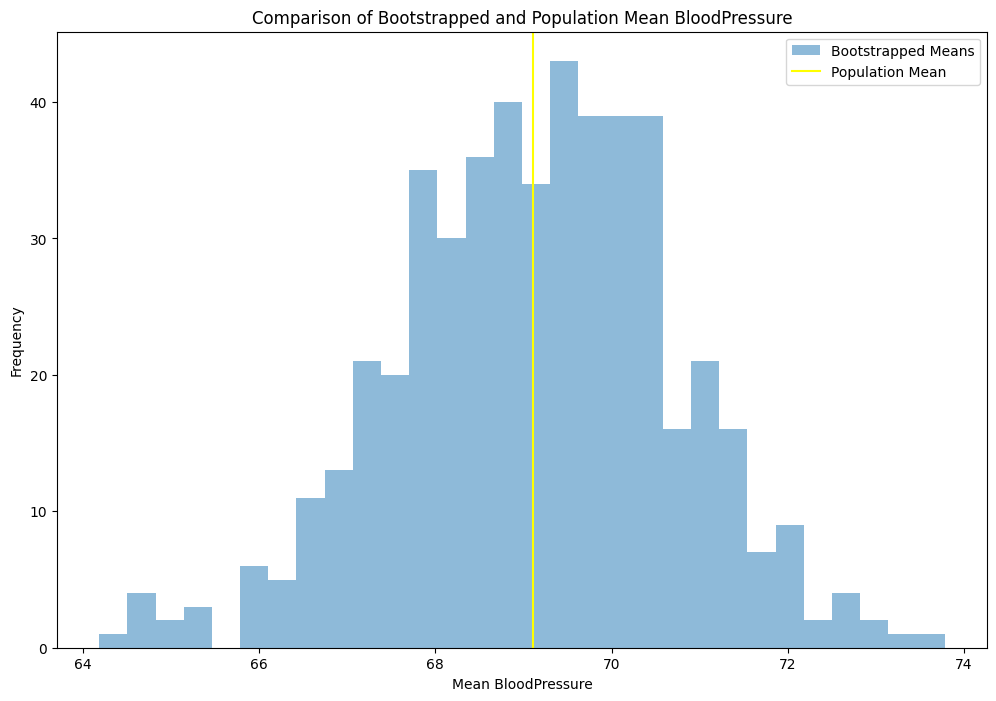

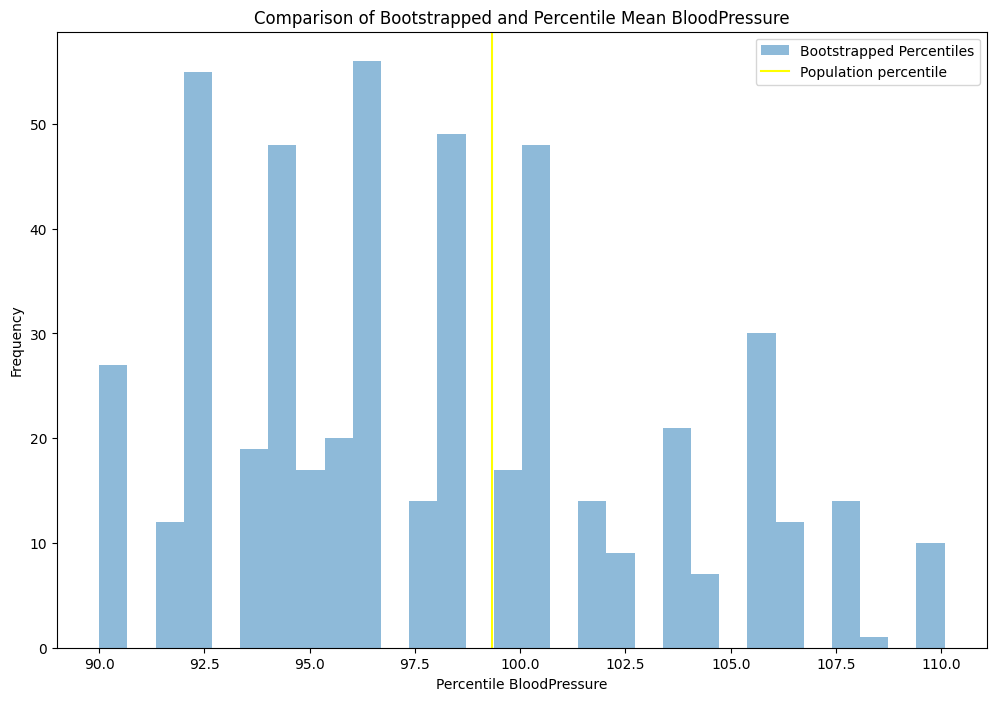

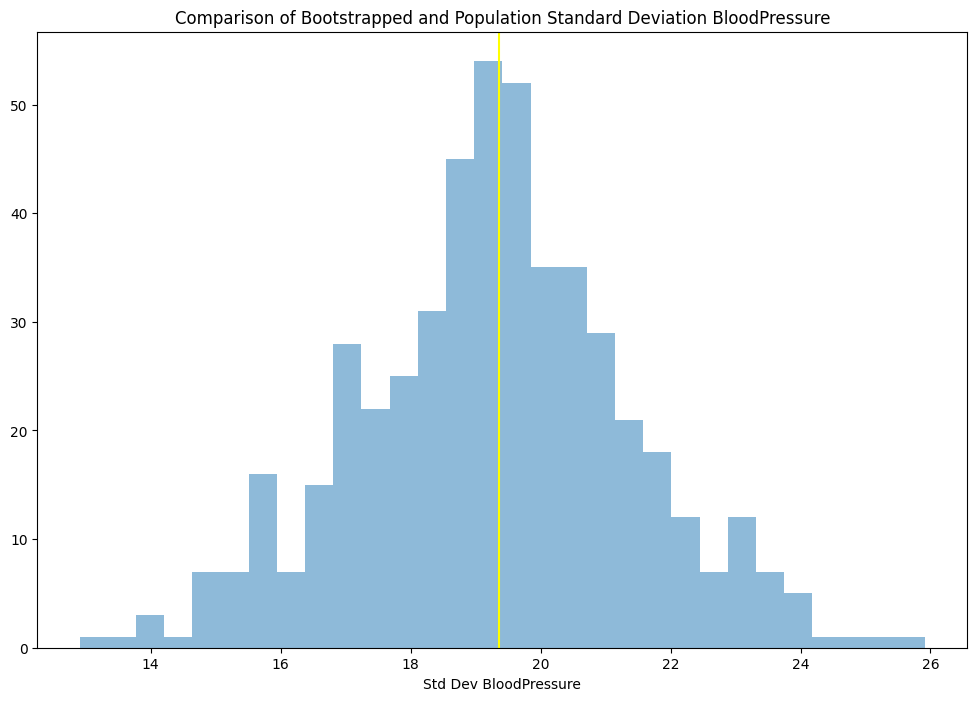

In [29]:
# Create 500 bootstrap samples of 150 observations each
bootstrapped_samples = []
for i in range(500):
    bootstrapped_sample = df_diabetes.sample(150, replace=True)
    bootstrapped_samples.append(bootstrapped_sample)

# Calculate the average mean, standard deviation, and percentile for BloodPressure of the bootstrapped samples
bootstrapped_means = []
bootstrapped_std_devs = []
bootstrapped_percentiles = []
for sample in bootstrapped_samples:
    bootstrapped_means.append(sample["BloodPressure"].mean())
    bootstrapped_std_devs.append(sample["BloodPressure"].std())
    bootstrapped_percentiles.append(sample["BloodPressure"].quantile(0.98))

# Calculate population mean, standard deviation, and percentile for BloodPressure
population_mean_blood_pressure = df_diabetes["BloodPressure"].mean()
population_std_dev_blood_pressure = df_diabetes["BloodPressure"].std()
population_98th_percentile_blood_pressure = df_diabetes["BloodPressure"].quantile(0.98)

print("population_mean_blood_pressure:",population_mean_blood_pressure)
print("population_std_dev_blood_pressure:",population_std_dev_blood_pressure)
print("population_98th_percentile_blood_pressure:",population_98th_percentile_blood_pressure)

# Create a chart to compare bootstrapped and population mean BloodPressure
plt.figure(figsize=(12, 8))
plt.hist(bootstrapped_means, bins=30, alpha=0.5, label="Bootstrapped Means")
plt.axvline(population_mean_blood_pressure, color="yellow", label="Population Mean")
plt.title("Comparison of Bootstrapped and Population Mean BloodPressure")
plt.xlabel("Mean BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Create a chart to compare bootstrapped and population mean BloodPressure
plt.figure(figsize=(12, 8))
plt.hist(bootstrapped_percentiles, bins=30, alpha=0.5, label="Bootstrapped Percentiles")
plt.axvline(population_98th_percentile_blood_pressure, color="yellow", label="Population percentile")
plt.title("Comparison of Bootstrapped and Percentile Mean BloodPressure")
plt.xlabel("Percentile BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Create a chart to compare bootstrapped and population standard deviation BloodPressure
plt.figure(figsize=(12, 8))
plt.hist(bootstrapped_std_devs, bins=30, alpha=0.5, label="Bootstrapped Std Devs")
plt.axvline(population_std_dev_blood_pressure, color="yellow", label="Population Std Dev")
plt.title("Comparison of Bootstrapped and Population Standard Deviation BloodPressure")
plt.xlabel("Std Dev BloodPressure")
plt
results_dir=('/Users/nagathanaykancharala/desktop/pds3/results')
plt.savefig(os.path.join(results_dir,'image.png'))
             